# Análisis armónico de las series temporales de altura de río


In [159]:
# -*- coding: utf-8 -*-
%reset -f
import pandas as pd
import numpy as np
import xarray as xr
import math
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

path = f'{workspace}tesis/datos/procesados/'
altura_rio_file = 'datosAlturaDeRio_sorted.nc'
##########################################################################################################################

##########################################################################################################################
ds_altura = xr.open_dataset(path+altura_rio_file, engine='netcdf4')

In [160]:
ds_altura['time']

<xarray.DataArray 'time' (time: 4503)>
array(['2007-01-01T00:00:00.000000000', '2007-01-02T00:00:00.000000000',
       '2007-01-03T00:00:00.000000000', ..., '2019-12-02T00:00:00.000000000',
       '2019-12-03T00:00:00.000000000', '2019-12-04T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2007-01-01 2007-01-02 ... 2019-12-04

In [171]:
#Me transformo el dataset en un pd.DataFrame y me fijo la cantidad de valores nulos.

df_altura = pd.DataFrame(ds_altura['SantoTome'])
df_altura.isna().sum()/len(df_altura)

0    0.01821
dtype: float64

In [173]:
# lleno los valores faltantes con el valor medio de la serie temporal

df_altura.fillna(df_altura.mean(), inplace=True)
df_altura

,0
0,3.689448
1,4.210000
2,5.200000
3,6.360000
4,3.689448
...,...
4498,4.040000
4499,4.600000
4500,5.140000
4501,3.689448


In [174]:
# me fijo si ya no tengo valores nulos

df_altura.isna().sum()

0    0
dtype: int64

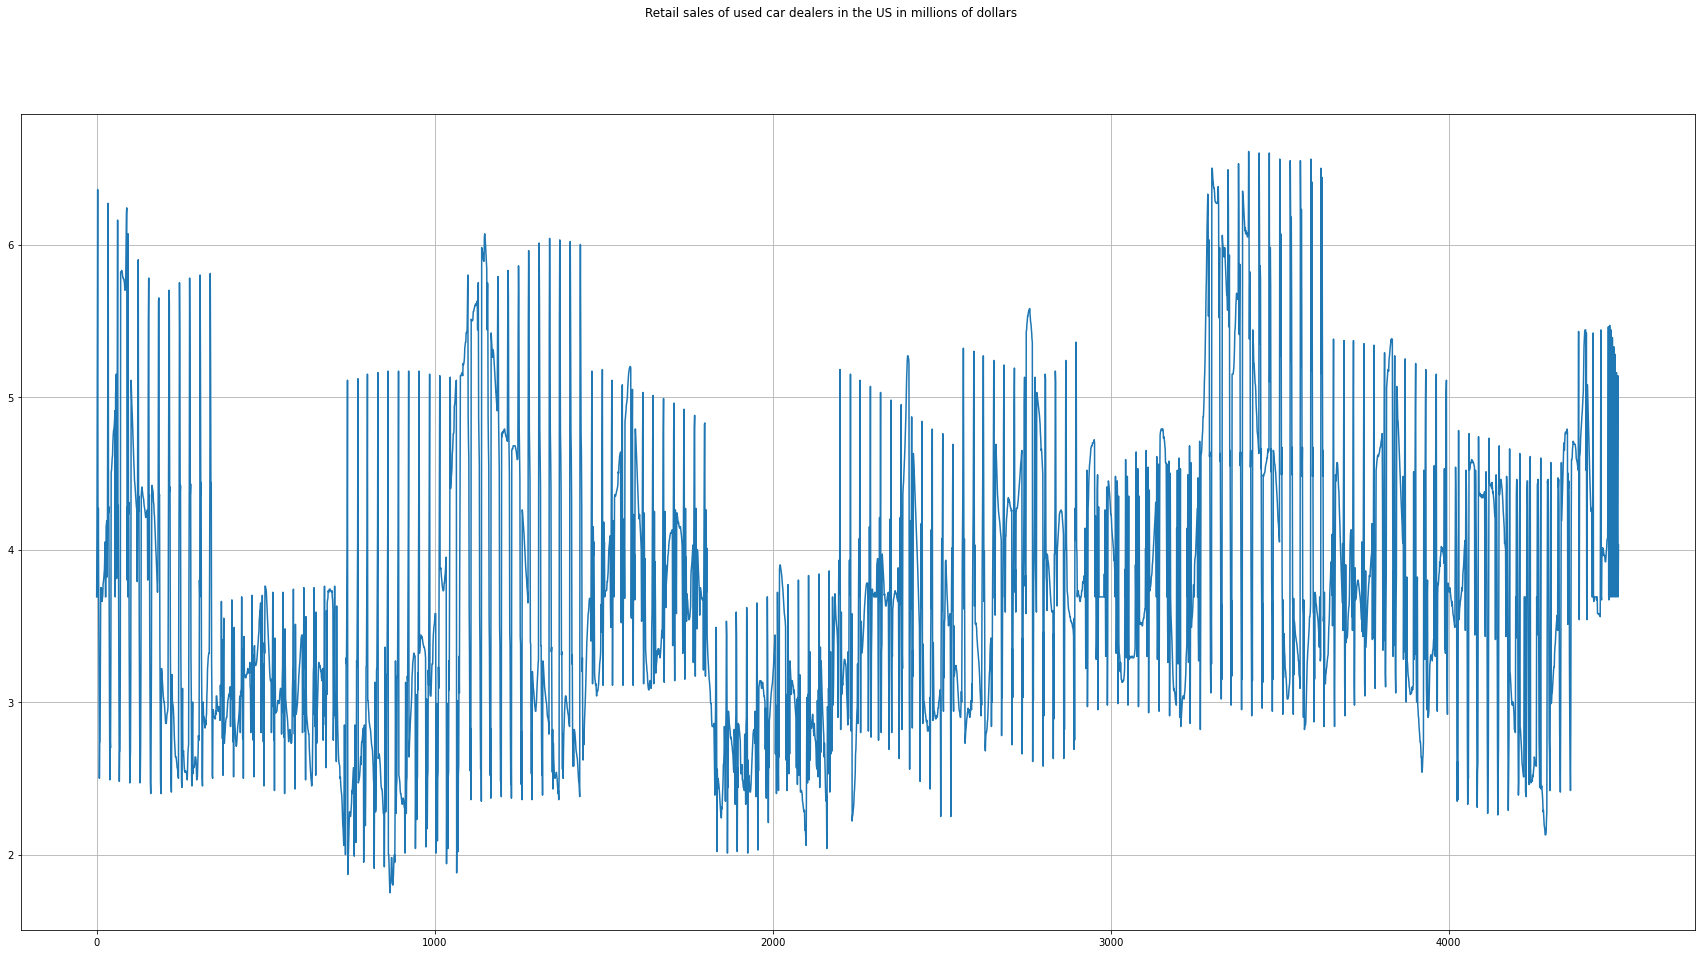

In [175]:
#df = pd.read_csv('retail_sales_used_car_dealers_us_1992_2020.csv', header=0, index_col=0, parse_dates=['DATE'], date_parser=mydateparser)

fig = plt.figure(figsize=(30,15))
fig.suptitle('Retail sales of used car dealers in the US in millions of dollars')
plt.plot(df_altura)
#xt = plt.xticks(np.arange(len(ds_altura['time'])), ds_altura['time'], rotation=90, ha='right')
plt.grid()
plt.show()

In [176]:
import pymannkendall as mk

mk_results = mk.original_test(df_altura)
slope=mk_results[7]
intercept = mk_results[8]

mk_results

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=18.407994054079865, Tau=0.18294827487040824, s=1854410.0, var_s=10148412744.0, slope=0.00019050326983224337, intercept=3.1511771396076202)

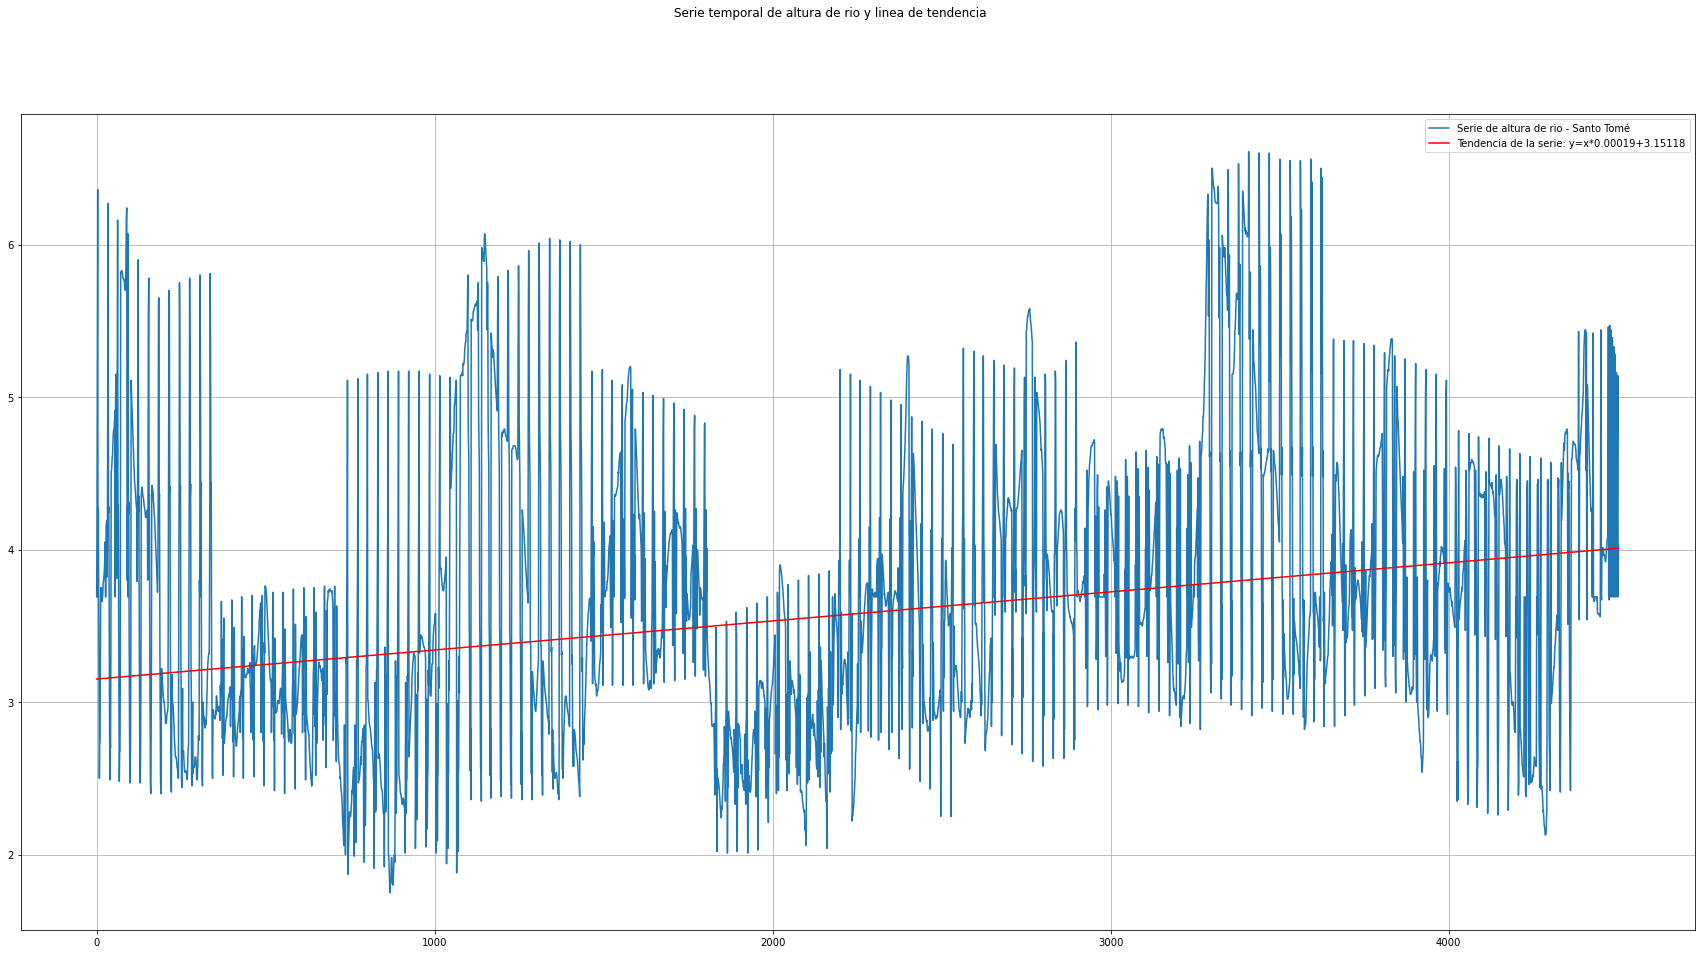

In [177]:
x = np.arange(len(df_altura))
y = slope * x + intercept

fig = plt.figure(figsize=(30,15))
fig.suptitle('Serie temporal de altura de rio y linea de tendencia')
plt.plot(df_altura, label='Serie de altura de rio - Santo Tomé')
plt.plot(y, label='Tendencia de la serie: y=x*0.00019+3.15118', c='r')
plt.legend()
plt.grid()
plt.show()

In [204]:
df_altura_sin_tendencia = np.subtract(np.array(df_altura), np.array(y).reshape(-1,1))
df_altura_sin_tendencia

array([[ 0.53827095],
       [ 1.05863236],
       [ 2.04844185],
       ...,
       [ 1.13155815],
       [-0.31918427],
       [ 0.02117714]])

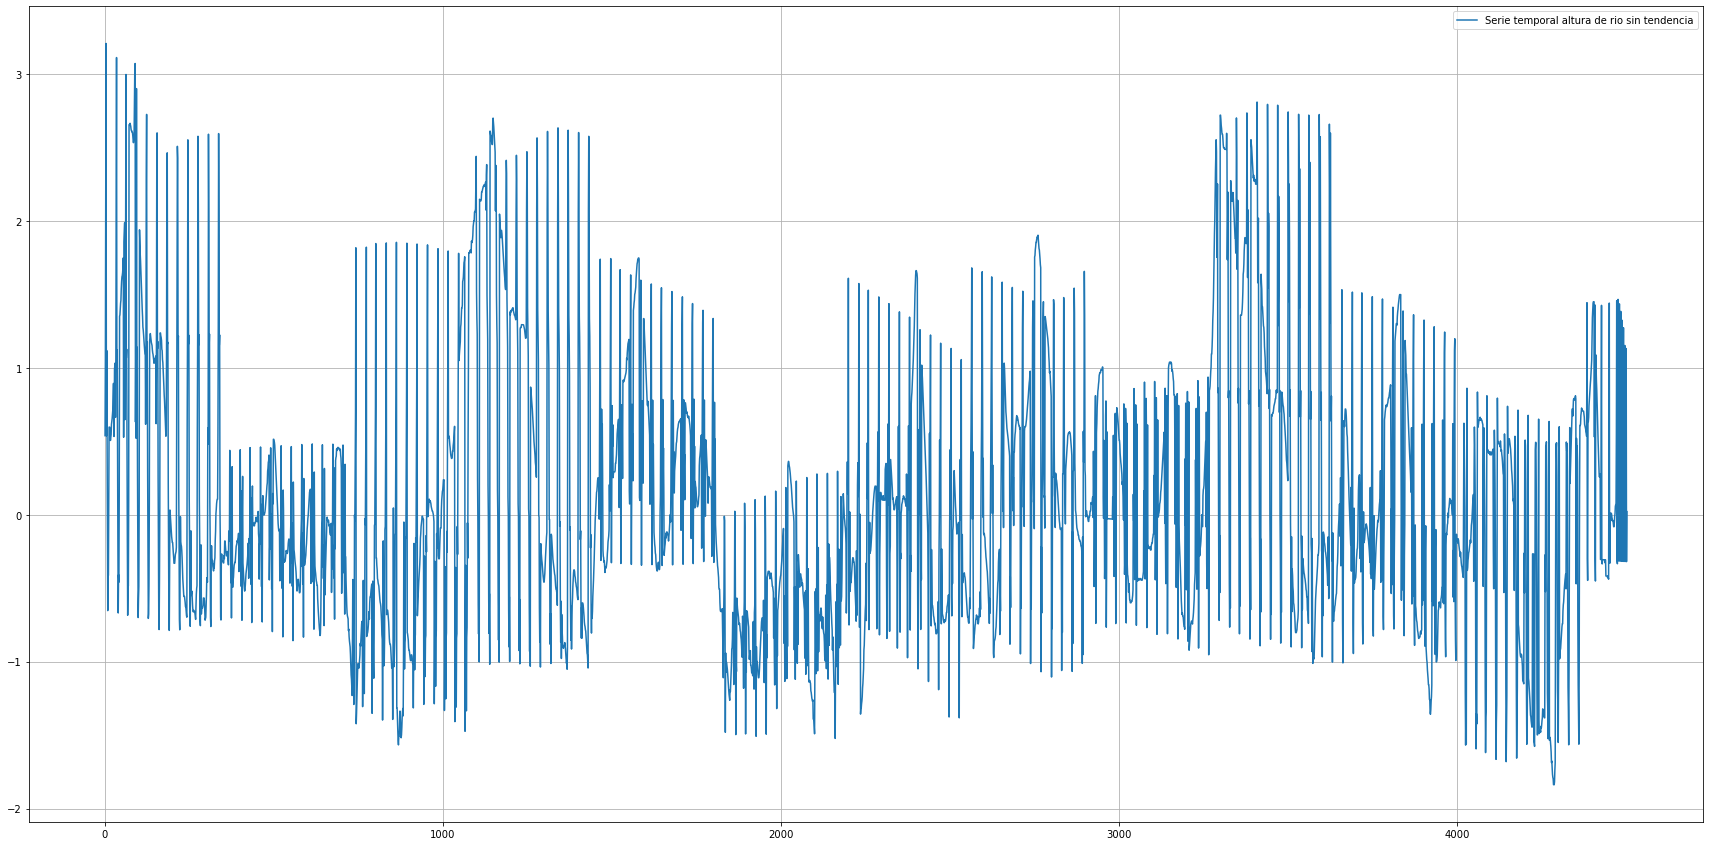

In [207]:
plt.figure(figsize=(30,15))
plt.plot(df_altura_sin_tendencia, label='Serie temporal altura de rio sin tendencia')
plt.grid()
plt.legend(loc='best')
plt.show()

<Figure size 2160x1080 with 0 Axes>

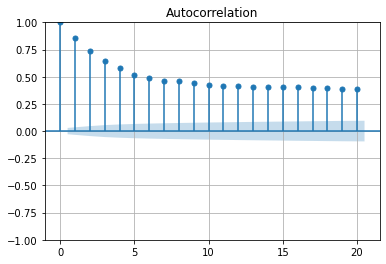

In [208]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(30,15))
plot_acf(df_altura, lags=20)
plt.grid()
plt.show()

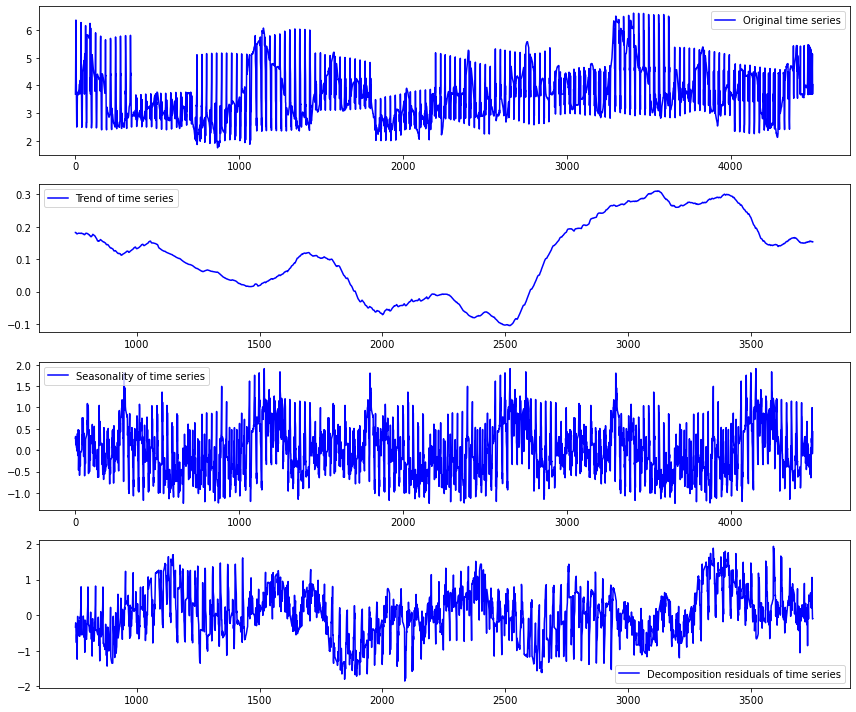

In [216]:
N=len(df_altura)
dt=1
i=[1,2,3,4]
T=N*dt


period = int(N*dt/(3))



results = seasonal_decompose(df_altura_sin_tendencia, model='additive', period=period)
trend_estimate    = results.trend
periodic_estimate = results.seasonal
residual = results.resid

plt.figure(figsize=(12,10))
plt.subplot(411)
plt.plot(df_altura,label='Original time series', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_estimate,label='Trend of time series',color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(periodic_estimate,label='Seasonality of time series',color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Decomposition residuals of time series',color='blue')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('decomposition_{}.png'.format(str(5)))
 


2251.5